In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from common import helper as h

/home/lix16/miniconda3/envs/e8125/lib/python3.8/site-packages/glfw/__init__.py:906: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


In [3]:
# load the Q-value array
env_name = "CartPole-v0"

work_dir = Path().cwd()/'results'/f'{env_name}/model'
data = h.load_object(work_dir/'rbf.pkl') # load q_table 
q_functions = data['q']
featurizer = data['featurizer']



<AxesSubplot:>

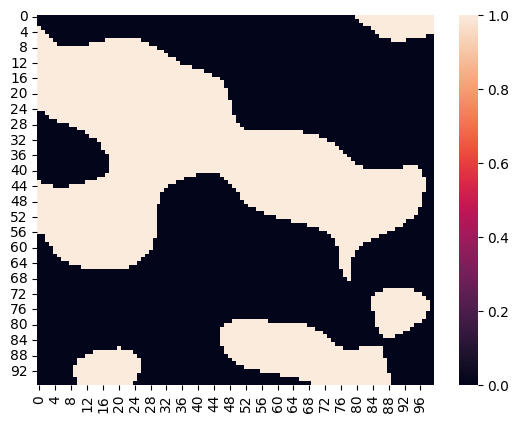

In [12]:
from sklearn.preprocessing import StandardScaler

obs_limit = np.array([4.8, 5, 0.5, 5])
samples = np.random.uniform(-obs_limit, obs_limit, (1000, obs_limit.shape[0]))        
scaler = StandardScaler().fit(samples) 
featurizer.fit(scaler.transform(samples))


def featurize(state):
    """ Map state to a higher dimension for better representation."""
    if len(state.shape) == 1:
        state = state.reshape(1, -1)

    return featurizer.transform(scaler.transform(state)) 


for q_a in q_functions:
    q_a.partial_fit(featurize(samples), np.zeros((samples.shape[0],)))

x = np.arange(-4.8, 4.8, step=.1)
y = np.arange(-.5, .5, step=.01)




values = np.zeros((len(x), len(y)))
for i, xx in enumerate(x):
    for j, yy in enumerate(y):
        state = np.array([xx, 0, yy, 0])
        values[i, j] = np.argmax([q.predict(featurize(state)) for q in q_functions])
        
        
sns.heatmap(values)



In [ ]:
# save value 
h.save_object({'value': values, 'axis': q_axis},
                work_dir/"value.pkl")